In [1]:
#import the dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from citipy import citipy


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

606

In [5]:
import requests
requests.__version__

'2.24.0'

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d9627287f4524613874457d10385800d


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | dingle
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | padang
Processing Record 4 of Set 1 | doha
Processing Record 5 of Set 1 | vaini
Processing Record 6 of Set 1 | shahrud
Processing Record 7 of Set 1 | hermanus
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | bilma
Processing Record 10 of Set 1 | mizdah
Processing Record 11 of Set 1 | busselton
Processing Record 12 of Set 1 | taburi
City not found. Skipping...
Processing Record 13 of Set 1 | amderma
City not found. Skipping...
Processing Record 14 of Set 1 | morant bay
Processing Record 15 of Set 1 | carbondale
Processing Record 16 of Set 1 | hobart
Processing Record 17 of Set 1 | porto novo
Processing Record 18 of Set 1 | constitucion
Processing Record 19 of Set 1 | saqqez
Processing Record 20 of Set 1 | maceio
Processing Record 21 of Set 1 | butaritari
Processing Record 22 of Set 1 | jiwani
Pro

Processing Record 37 of Set 4 | bilibino
Processing Record 38 of Set 4 | erenhot
Processing Record 39 of Set 4 | pisco
Processing Record 40 of Set 4 | brainerd
Processing Record 41 of Set 4 | sao jose da coroa grande
Processing Record 42 of Set 4 | tarudant
City not found. Skipping...
Processing Record 43 of Set 4 | yerbogachen
Processing Record 44 of Set 4 | shorewood
Processing Record 45 of Set 4 | desaguadero
Processing Record 46 of Set 4 | barrow
Processing Record 47 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 48 of Set 4 | lazurne
Processing Record 49 of Set 4 | remuna
Processing Record 50 of Set 4 | guerrero negro
Processing Record 1 of Set 5 | arraial do cabo
Processing Record 2 of Set 5 | araci
Processing Record 3 of Set 5 | craigieburn
Processing Record 4 of Set 5 | chokurdakh
Processing Record 5 of Set 5 | san
Processing Record 6 of Set 5 | novyy svit
Processing Record 7 of Set 5 | manggar
Processing Record 8 of Set 5 | jaque
Processing Record 9 of Set 5

Processing Record 24 of Set 8 | roccastrada
Processing Record 25 of Set 8 | havre
Processing Record 26 of Set 8 | tocantinopolis
City not found. Skipping...
Processing Record 27 of Set 8 | charters towers
Processing Record 28 of Set 8 | vero beach
Processing Record 29 of Set 8 | gulf gate estates
Processing Record 30 of Set 8 | marzuq
Processing Record 31 of Set 8 | dumabato
Processing Record 32 of Set 8 | chirongui
Processing Record 33 of Set 8 | lasa
Processing Record 34 of Set 8 | rawson
Processing Record 35 of Set 8 | mamallapuram
Processing Record 36 of Set 8 | kapoeta
Processing Record 37 of Set 8 | meulaboh
Processing Record 38 of Set 8 | jacksonville
Processing Record 39 of Set 8 | wucheng
Processing Record 40 of Set 8 | saint george
Processing Record 41 of Set 8 | kahului
Processing Record 42 of Set 8 | ola
Processing Record 43 of Set 8 | chagda
City not found. Skipping...
Processing Record 44 of Set 8 | ca mau
Processing Record 45 of Set 8 | kavieng
Processing Record 46 of Se

Processing Record 12 of Set 12 | walvis bay
Processing Record 13 of Set 12 | karera
Processing Record 14 of Set 12 | yurty
Processing Record 15 of Set 12 | urumqi
Processing Record 16 of Set 12 | inuvik
Processing Record 17 of Set 12 | batagay
Processing Record 18 of Set 12 | hobyo
Processing Record 19 of Set 12 | moche
Processing Record 20 of Set 12 | pocone
Processing Record 21 of Set 12 | labuhan
Processing Record 22 of Set 12 | jalingo
Processing Record 23 of Set 12 | hofn
Processing Record 24 of Set 12 | piterka
Processing Record 25 of Set 12 | jackson
Processing Record 26 of Set 12 | sarkand
Processing Record 27 of Set 12 | burlington
Processing Record 28 of Set 12 | correntina
Processing Record 29 of Set 12 | provideniya
Processing Record 30 of Set 12 | tongliao
Processing Record 31 of Set 12 | teahupoo
Processing Record 32 of Set 12 | caravelas
Processing Record 33 of Set 12 | venado tuerto
Processing Record 34 of Set 12 | vila franca do campo
Processing Record 35 of Set 12 | e

In [11]:
len(city_data)

554

In [20]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Dingle,11.00,122.67,85.30,72,91,1.86,PH,2020-07-10 01:23:30
1,Punta Arenas,-53.15,-70.92,33.80,80,99,12.75,CL,2020-07-10 01:18:51
2,Padang,-0.95,100.35,79.74,71,90,3.96,ID,2020-07-10 01:23:30
3,Doha,25.29,51.53,93.99,89,0,5.82,QA,2020-07-10 01:23:30
4,Vaini,-21.20,-175.20,75.20,88,75,4.70,TO,2020-07-10 01:23:30
5,Shahrud,36.42,54.98,71.73,33,0,7.61,IR,2020-07-10 01:23:31
6,Hermanus,-34.42,19.23,51.01,87,100,1.99,ZA,2020-07-10 01:23:31
7,Ushuaia,-54.80,-68.30,35.60,69,75,8.05,AR,2020-07-10 01:23:31
8,Bilma,18.69,12.92,88.38,19,95,3.49,NE,2020-07-10 01:23:31
9,Mizdah,31.45,12.98,67.55,75,0,7.87,LY,2020-07-10 01:23:31


In [24]:
new_column_order = ["City","Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Dingle,PH,2020-07-10 01:23:30,11.00,122.67,85.30,72,91,1.86
1,Punta Arenas,CL,2020-07-10 01:18:51,-53.15,-70.92,33.80,80,99,12.75
2,Padang,ID,2020-07-10 01:23:30,-0.95,100.35,79.74,71,90,3.96
3,Doha,QA,2020-07-10 01:23:30,25.29,51.53,93.99,89,0,5.82
4,Vaini,TO,2020-07-10 01:23:30,-21.20,-175.20,75.20,88,75,4.70
...,...,...,...,...,...,...,...,...,...
549,Sanmenxia,CN,2020-07-10 01:25:06,34.77,111.18,81.19,60,100,10.67
550,Qostanay,KZ,2020-07-10 01:25:06,53.17,63.58,71.60,60,0,8.95
551,Tanout,NE,2020-07-10 01:25:07,14.97,8.89,92.46,26,100,5.64
552,Zdvinsk,RU,2020-07-10 01:25:07,54.70,78.66,67.64,93,100,11.68


In [25]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [26]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [29]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'07/10/20'

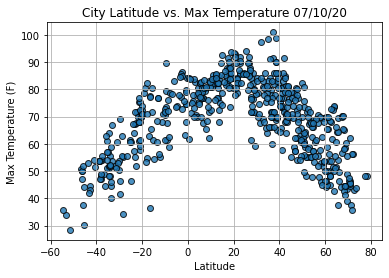

In [31]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

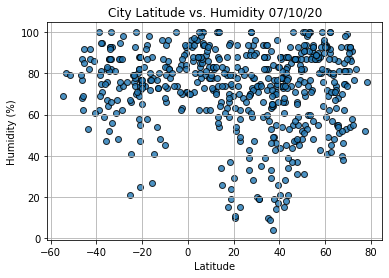

In [32]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

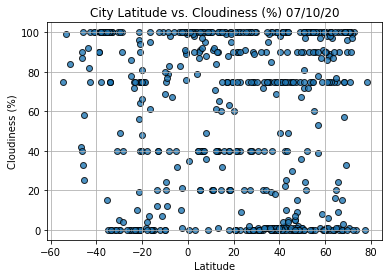

In [33]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

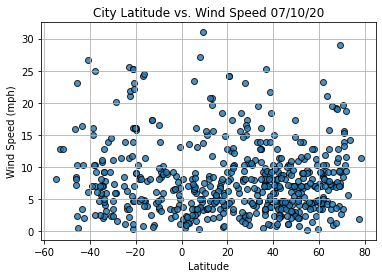

In [34]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()